In [2]:
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("C:\\Users\\moham\\Downloads\\inputs\\heart_v2.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [7]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [9]:
#Putting feature variables to x
X=df.drop(columns="heart disease",axis=1)

#Putting response variable to y
y = df["heart disease"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape,X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt= DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
!pip install six

In [15]:
#Importing packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

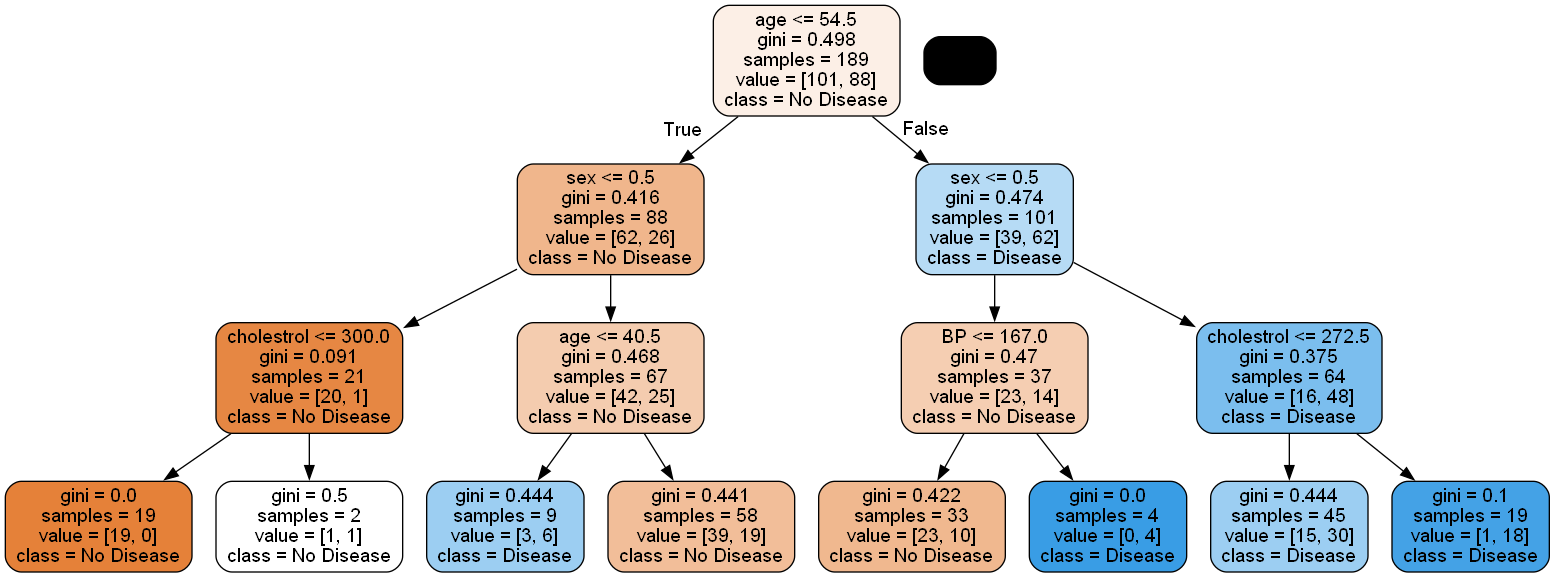

In [16]:
dot_data= StringIO()

export_graphviz(dt, out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=["No Disease","Disease"])
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Evaluating Model performance

In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [19]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [20]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

Creating helper functions to evaluate model performance and help plot the decision tree

In [21]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [22]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Without setting any hyper-parameters

In [23]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

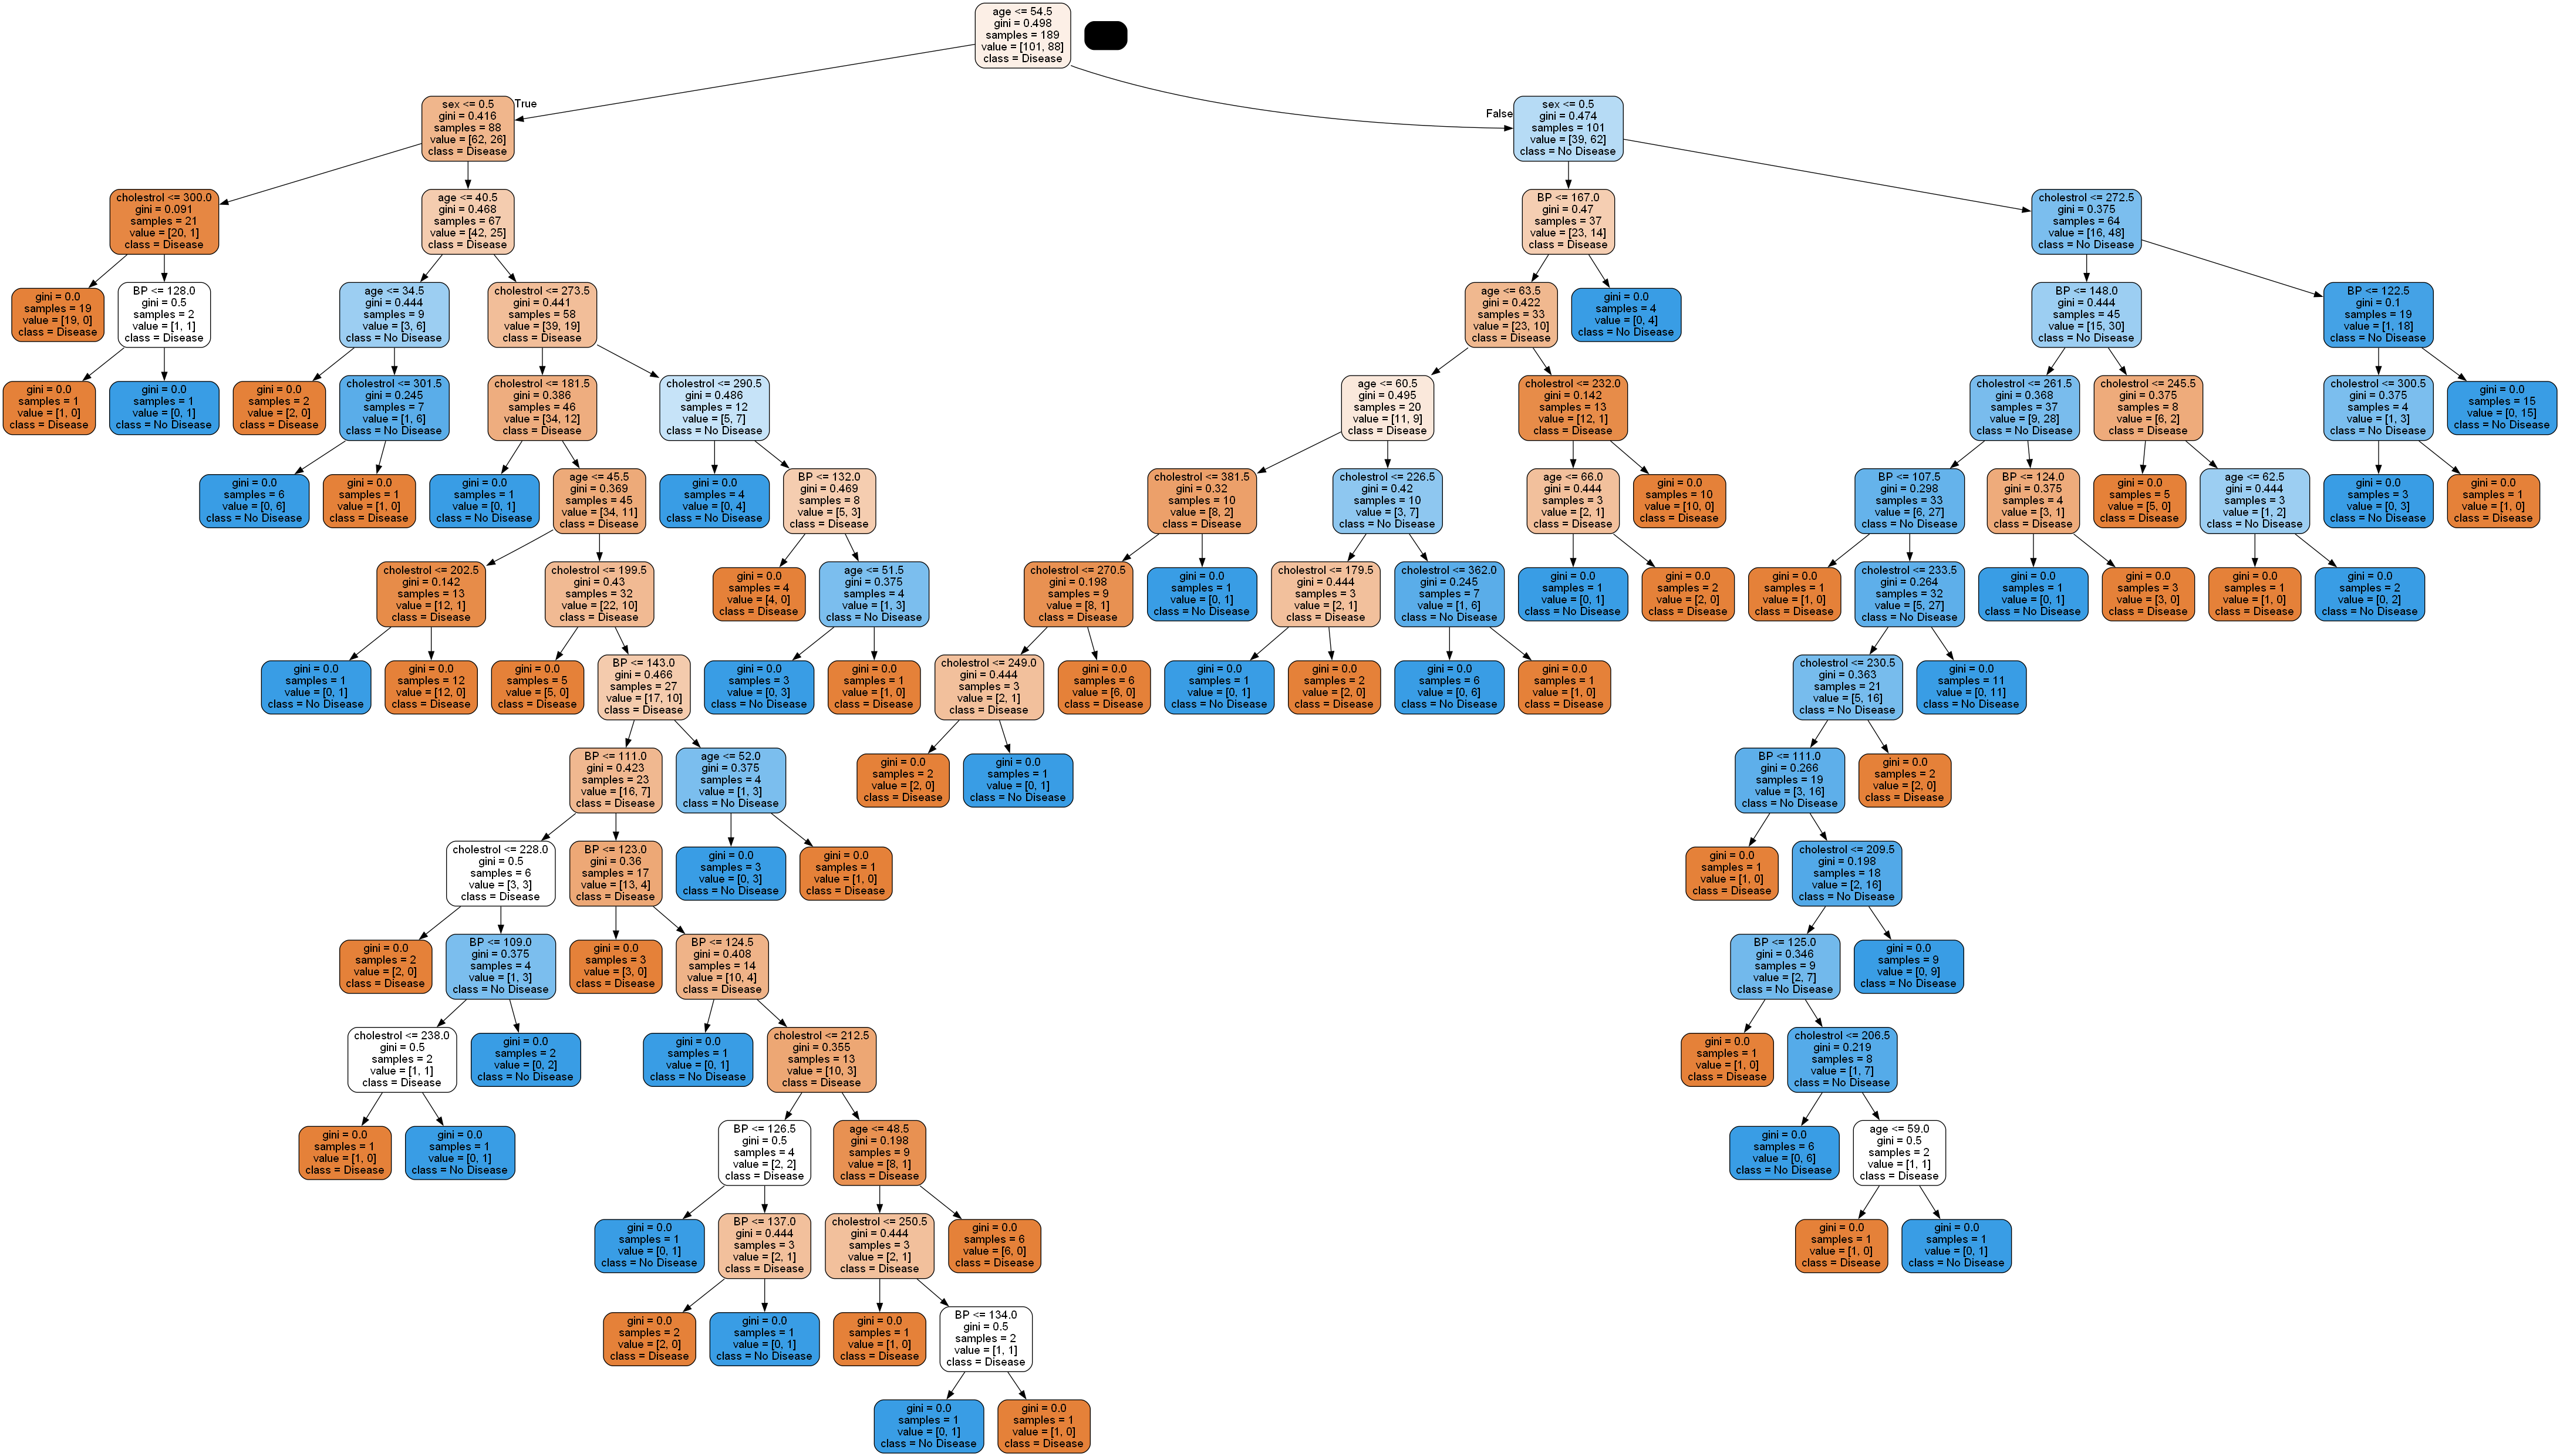

In [24]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [25]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


Controlling the depth of the tree

In [26]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

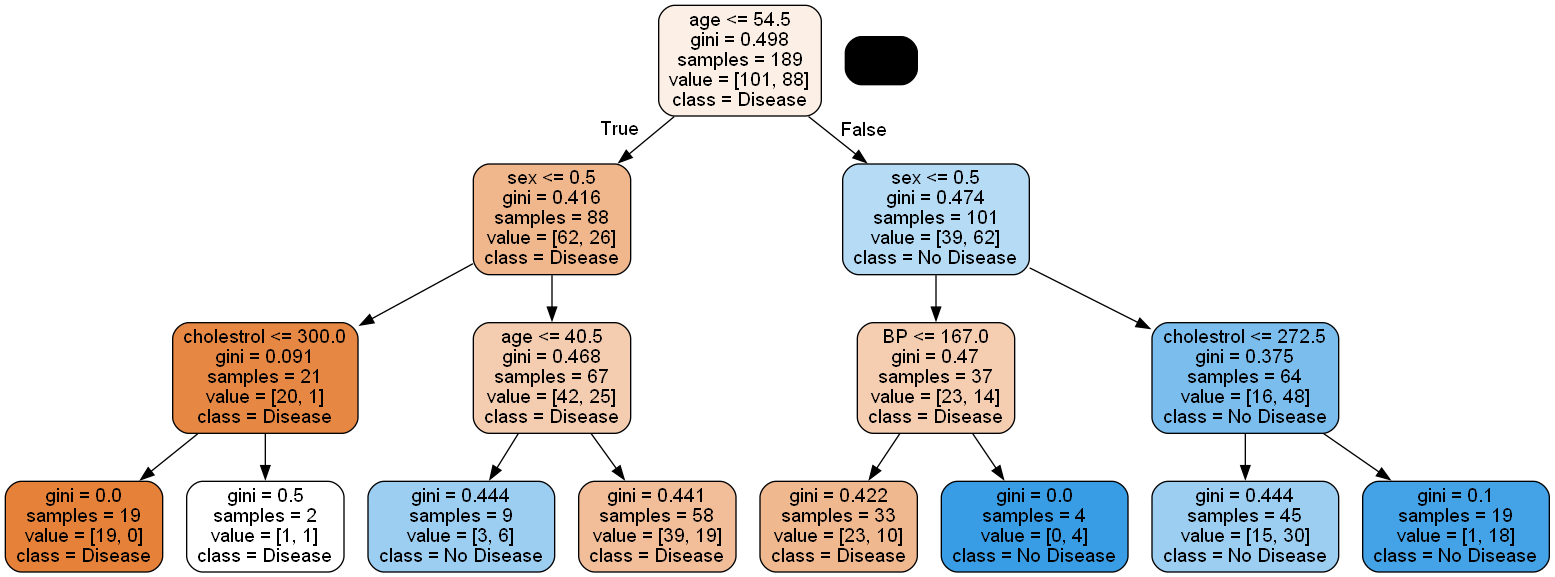

In [27]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [28]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]
